In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CI
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


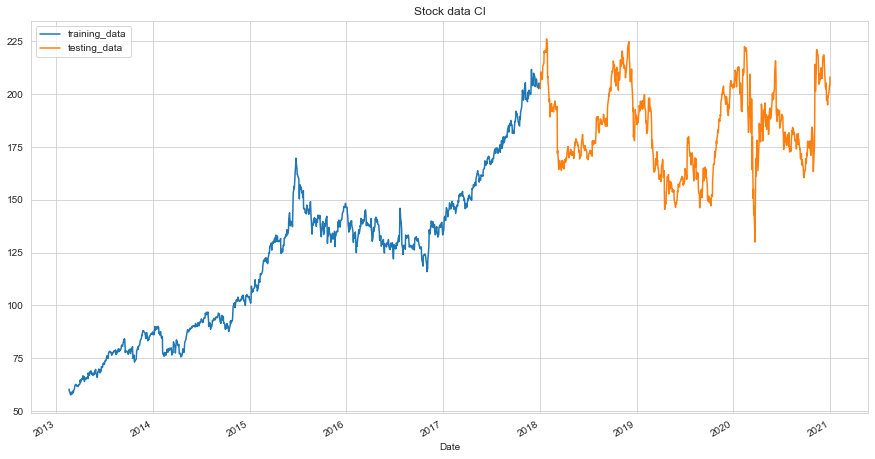

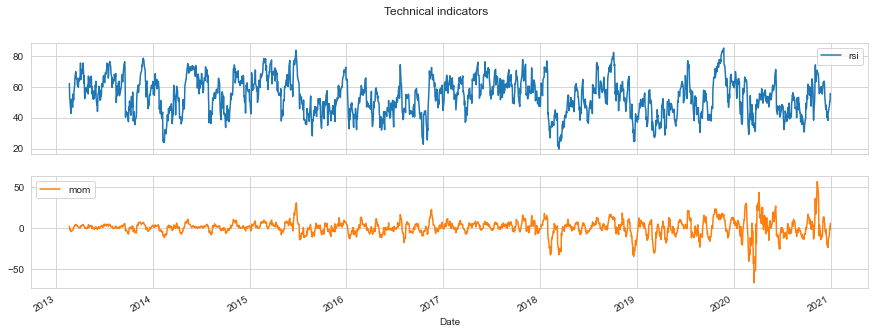

In [2]:
stock_name = 'ci'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1602.85, duration: 0:00:00.270063
episode: 2/2000, episode end value: 1603.85, duration: 0:00:00.282063
episode: 3/2000, episode end value: 1604.69, duration: 0:00:00.283065
episode: 4/2000, episode end value: 1604.76, duration: 0:00:00.265060
episode: 5/2000, episode end value: 1604.46, duration: 0:00:00.294066
episode: 6/2000, episode end value: 1605.97, duration: 0:00:00.281066
episode: 7/2000, episode end value: 1604.72, duration: 0:00:00.275877
episode: 8/2000, episode end value: 1604.92, duration: 0:00:00.277188
episode: 9/2000, episode end value: 1598.89, duration: 0:00:00.265070
episode: 10/2000, episode end value: 1596.12, duration: 0:00:00.234042
episode: 11/2000, episode end value: 1594.55, duration: 0:00:00.254056
episode: 12/2000, episode end value: 1595.32, duration: 0:00:00.237050
episode: 13/2000, episode end value: 1595.21, duration: 0:00:00.238068
episode: 14/2000, episode end value: 1592.66, duration: 0:00:00.242055
episode: 15/200

episode: 117/2000, episode end value: 1592.84, duration: 0:00:00.305068
episode: 118/2000, episode end value: 1596.99, duration: 0:00:00.374084
episode: 119/2000, episode end value: 1594.89, duration: 0:00:00.343080
episode: 120/2000, episode end value: 1594.45, duration: 0:00:00.319071
episode: 121/2000, episode end value: 1597.17, duration: 0:00:00.349078
episode: 122/2000, episode end value: 1597.32, duration: 0:00:00.334074
episode: 123/2000, episode end value: 1594.61, duration: 0:00:00.387092
episode: 124/2000, episode end value: 1596.72, duration: 0:00:00.306069
episode: 125/2000, episode end value: 1596.00, duration: 0:00:00.317071
episode: 126/2000, episode end value: 1593.19, duration: 0:00:00.305066
episode: 127/2000, episode end value: 1594.59, duration: 0:00:00.282080
episode: 128/2000, episode end value: 1593.03, duration: 0:00:00.286048
episode: 129/2000, episode end value: 1591.44, duration: 0:00:00.271059
episode: 130/2000, episode end value: 1593.08, duration: 0:00:00

episode: 231/2000, episode end value: 1592.19, duration: 0:00:00.368081
episode: 232/2000, episode end value: 1593.88, duration: 0:00:00.341081
episode: 233/2000, episode end value: 1592.86, duration: 0:00:00.330072
episode: 234/2000, episode end value: 1595.44, duration: 0:00:00.322074
episode: 235/2000, episode end value: 1593.48, duration: 0:00:00.337077
episode: 236/2000, episode end value: 1590.54, duration: 0:00:00.331073
episode: 237/2000, episode end value: 1591.41, duration: 0:00:00.342083
episode: 238/2000, episode end value: 1591.96, duration: 0:00:00.345071
episode: 239/2000, episode end value: 1596.92, duration: 0:00:00.335073
episode: 240/2000, episode end value: 1597.37, duration: 0:00:00.339076
episode: 241/2000, episode end value: 1597.73, duration: 0:00:00.322074
episode: 242/2000, episode end value: 1593.15, duration: 0:00:00.332073
episode: 243/2000, episode end value: 1593.05, duration: 0:00:00.395089
episode: 244/2000, episode end value: 1591.29, duration: 0:00:00

episode: 345/2000, episode end value: 1592.51, duration: 0:00:00.509115
episode: 346/2000, episode end value: 1591.82, duration: 0:00:00.487111
episode: 347/2000, episode end value: 1593.72, duration: 0:00:00.565128
episode: 348/2000, episode end value: 1589.86, duration: 0:00:00.598135
episode: 349/2000, episode end value: 1592.55, duration: 0:00:00.571134
episode: 350/2000, episode end value: 1592.94, duration: 0:00:00.601455
episode: 351/2000, episode end value: 1593.45, duration: 0:00:00.544362
episode: 352/2000, episode end value: 1591.24, duration: 0:00:00.488111
episode: 353/2000, episode end value: 1593.29, duration: 0:00:00.595128
episode: 354/2000, episode end value: 1593.40, duration: 0:00:00.558791
episode: 355/2000, episode end value: 1594.59, duration: 0:00:00.527121
episode: 356/2000, episode end value: 1592.87, duration: 0:00:00.457106
episode: 357/2000, episode end value: 1593.91, duration: 0:00:00.473104
episode: 358/2000, episode end value: 1594.01, duration: 0:00:00

episode: 459/2000, episode end value: 1593.08, duration: 0:00:00.468102
episode: 460/2000, episode end value: 1595.06, duration: 0:00:00.566128
episode: 461/2000, episode end value: 1597.98, duration: 0:00:00.531121
episode: 462/2000, episode end value: 1597.11, duration: 0:00:00.516116
episode: 463/2000, episode end value: 1593.81, duration: 0:00:00.460107
episode: 464/2000, episode end value: 1593.40, duration: 0:00:00.461104
episode: 465/2000, episode end value: 1593.32, duration: 0:00:00.511115
episode: 466/2000, episode end value: 1595.80, duration: 0:00:00.466104
episode: 467/2000, episode end value: 1594.57, duration: 0:00:00.455103
episode: 468/2000, episode end value: 1594.39, duration: 0:00:00.509114
episode: 469/2000, episode end value: 1593.82, duration: 0:00:00.528119
episode: 470/2000, episode end value: 1595.80, duration: 0:00:00.513120
episode: 471/2000, episode end value: 1591.80, duration: 0:00:00.433096
episode: 472/2000, episode end value: 1592.64, duration: 0:00:00

episode: 573/2000, episode end value: 1591.15, duration: 0:00:00.473105
episode: 574/2000, episode end value: 1593.75, duration: 0:00:00.519123
episode: 575/2000, episode end value: 1591.36, duration: 0:00:00.525116
episode: 576/2000, episode end value: 1593.31, duration: 0:00:00.500110
episode: 577/2000, episode end value: 1594.48, duration: 0:00:00.494116
episode: 578/2000, episode end value: 1593.53, duration: 0:00:00.468106
episode: 579/2000, episode end value: 1592.22, duration: 0:00:00.528124
episode: 580/2000, episode end value: 1593.77, duration: 0:00:00.523117
episode: 581/2000, episode end value: 1593.90, duration: 0:00:00.492660
episode: 582/2000, episode end value: 1594.21, duration: 0:00:00.500119
episode: 583/2000, episode end value: 1596.47, duration: 0:00:00.521118
episode: 584/2000, episode end value: 1594.93, duration: 0:00:00.543169
episode: 585/2000, episode end value: 1594.07, duration: 0:00:00.478718
episode: 586/2000, episode end value: 1594.54, duration: 0:00:00

episode: 687/2000, episode end value: 1595.72, duration: 0:00:00.513115
episode: 688/2000, episode end value: 1586.68, duration: 0:00:00.430100
episode: 689/2000, episode end value: 1595.37, duration: 0:00:00.538122
episode: 690/2000, episode end value: 1589.63, duration: 0:00:00.446099
episode: 691/2000, episode end value: 1590.78, duration: 0:00:00.515115
episode: 692/2000, episode end value: 1594.46, duration: 0:00:00.537193
episode: 693/2000, episode end value: 1592.63, duration: 0:00:00.468645
episode: 694/2000, episode end value: 1594.12, duration: 0:00:00.505394
episode: 695/2000, episode end value: 1591.14, duration: 0:00:00.461101
episode: 696/2000, episode end value: 1591.95, duration: 0:00:00.496113
episode: 697/2000, episode end value: 1592.78, duration: 0:00:00.527120
episode: 698/2000, episode end value: 1593.35, duration: 0:00:00.441098
episode: 699/2000, episode end value: 1594.02, duration: 0:00:00.419094
episode: 700/2000, episode end value: 1593.78, duration: 0:00:00

episode: 801/2000, episode end value: 1587.89, duration: 0:00:00.538124
episode: 802/2000, episode end value: 1586.11, duration: 0:00:00.471102
episode: 803/2000, episode end value: 1592.77, duration: 0:00:00.466105
episode: 804/2000, episode end value: 1594.18, duration: 0:00:00.508116
episode: 805/2000, episode end value: 1591.64, duration: 0:00:00.580136
episode: 806/2000, episode end value: 1590.73, duration: 0:00:00.529115
episode: 807/2000, episode end value: 1587.98, duration: 0:00:00.527120
episode: 808/2000, episode end value: 1593.12, duration: 0:00:00.500113
episode: 809/2000, episode end value: 1586.61, duration: 0:00:00.480113
episode: 810/2000, episode end value: 1591.03, duration: 0:00:00.426091
episode: 811/2000, episode end value: 1592.13, duration: 0:00:00.430103
episode: 812/2000, episode end value: 1591.55, duration: 0:00:00.553125
episode: 813/2000, episode end value: 1593.36, duration: 0:00:00.574134
episode: 814/2000, episode end value: 1593.17, duration: 0:00:00

episode: 915/2000, episode end value: 1591.58, duration: 0:00:00.475111
episode: 916/2000, episode end value: 1587.85, duration: 0:00:00.439101
episode: 917/2000, episode end value: 1589.58, duration: 0:00:00.488112
episode: 918/2000, episode end value: 1583.27, duration: 0:00:00.443097
episode: 919/2000, episode end value: 1586.61, duration: 0:00:00.484108
episode: 920/2000, episode end value: 1581.69, duration: 0:00:00.442102
episode: 921/2000, episode end value: 1586.25, duration: 0:00:00.517115
episode: 922/2000, episode end value: 1588.09, duration: 0:00:00.425097
episode: 923/2000, episode end value: 1585.48, duration: 0:00:00.418093
episode: 924/2000, episode end value: 1585.65, duration: 0:00:00.445102
episode: 925/2000, episode end value: 1583.86, duration: 0:00:00.440104
episode: 926/2000, episode end value: 1582.32, duration: 0:00:00.494113
episode: 927/2000, episode end value: 1588.01, duration: 0:00:00.499112
episode: 928/2000, episode end value: 1586.88, duration: 0:00:00

episode: 1029/2000, episode end value: 1590.58, duration: 0:00:00.482857
episode: 1030/2000, episode end value: 1596.94, duration: 0:00:00.519116
episode: 1031/2000, episode end value: 1592.98, duration: 0:00:00.570159
episode: 1032/2000, episode end value: 1595.56, duration: 0:00:00.574132
episode: 1033/2000, episode end value: 1596.60, duration: 0:00:00.542118
episode: 1034/2000, episode end value: 1592.81, duration: 0:00:00.532118
episode: 1035/2000, episode end value: 1592.06, duration: 0:00:00.518089
episode: 1036/2000, episode end value: 1592.32, duration: 0:00:00.461106
episode: 1037/2000, episode end value: 1592.21, duration: 0:00:00.520117
episode: 1038/2000, episode end value: 1591.54, duration: 0:00:00.486110
episode: 1039/2000, episode end value: 1594.27, duration: 0:00:00.518117
episode: 1040/2000, episode end value: 1592.90, duration: 0:00:00.551125
episode: 1041/2000, episode end value: 1592.58, duration: 0:00:00.566130
episode: 1042/2000, episode end value: 1592.39, dur

episode: 1142/2000, episode end value: 1593.25, duration: 0:00:00.508114
episode: 1143/2000, episode end value: 1595.54, duration: 0:00:00.473101
episode: 1144/2000, episode end value: 1595.13, duration: 0:00:00.516122
episode: 1145/2000, episode end value: 1603.83, duration: 0:00:00.519114
episode: 1146/2000, episode end value: 1594.97, duration: 0:00:00.519117
episode: 1147/2000, episode end value: 1594.39, duration: 0:00:00.491108
episode: 1148/2000, episode end value: 1594.29, duration: 0:00:00.472108
episode: 1149/2000, episode end value: 1592.17, duration: 0:00:00.432099
episode: 1150/2000, episode end value: 1590.63, duration: 0:00:00.480106
episode: 1151/2000, episode end value: 1591.72, duration: 0:00:00.506111
episode: 1152/2000, episode end value: 1594.30, duration: 0:00:00.500111
episode: 1153/2000, episode end value: 1594.31, duration: 0:00:00.494113
episode: 1154/2000, episode end value: 1592.87, duration: 0:00:00.453107
episode: 1155/2000, episode end value: 1594.05, dur

episode: 1255/2000, episode end value: 1592.31, duration: 0:00:00.488111
episode: 1256/2000, episode end value: 1592.98, duration: 0:00:00.469109
episode: 1257/2000, episode end value: 1594.00, duration: 0:00:00.476102
episode: 1258/2000, episode end value: 1594.67, duration: 0:00:00.485112
episode: 1259/2000, episode end value: 1593.22, duration: 0:00:00.495111
episode: 1260/2000, episode end value: 1592.04, duration: 0:00:00.449338
episode: 1261/2000, episode end value: 1594.16, duration: 0:00:00.446800
episode: 1262/2000, episode end value: 1593.34, duration: 0:00:00.487111
episode: 1263/2000, episode end value: 1595.38, duration: 0:00:00.494111
episode: 1264/2000, episode end value: 1591.70, duration: 0:00:00.521119
episode: 1265/2000, episode end value: 1598.19, duration: 0:00:00.477112
episode: 1266/2000, episode end value: 1589.34, duration: 0:00:00.492104
episode: 1267/2000, episode end value: 1593.63, duration: 0:00:00.535120
episode: 1268/2000, episode end value: 1591.22, dur

episode: 1368/2000, episode end value: 1648.29, duration: 0:00:00.363082
episode: 1369/2000, episode end value: 1600.84, duration: 0:00:00.377085
episode: 1370/2000, episode end value: 1613.10, duration: 0:00:00.448132
episode: 1371/2000, episode end value: 1647.63, duration: 0:00:00.359080
episode: 1372/2000, episode end value: 1655.11, duration: 0:00:00.371092
episode: 1373/2000, episode end value: 1624.52, duration: 0:00:00.361076
episode: 1374/2000, episode end value: 1670.29, duration: 0:00:00.370081
episode: 1375/2000, episode end value: 1701.54, duration: 0:00:00.386094
episode: 1376/2000, episode end value: 1646.74, duration: 0:00:00.313074
episode: 1377/2000, episode end value: 1699.45, duration: 0:00:00.314067
episode: 1378/2000, episode end value: 1596.48, duration: 0:00:00.343079
episode: 1379/2000, episode end value: 1650.01, duration: 0:00:00.423094
episode: 1380/2000, episode end value: 1593.37, duration: 0:00:00.418096
episode: 1381/2000, episode end value: 1614.49, dur

episode: 1481/2000, episode end value: 1591.70, duration: 0:00:00.462105
episode: 1482/2000, episode end value: 1593.00, duration: 0:00:00.482107
episode: 1483/2000, episode end value: 1594.51, duration: 0:00:00.486111
episode: 1484/2000, episode end value: 1592.49, duration: 0:00:00.521117
episode: 1485/2000, episode end value: 1594.42, duration: 0:00:00.475110
episode: 1486/2000, episode end value: 1594.91, duration: 0:00:00.428091
episode: 1487/2000, episode end value: 1594.03, duration: 0:00:00.521118
episode: 1488/2000, episode end value: 1594.65, duration: 0:00:00.471105
episode: 1489/2000, episode end value: 1595.48, duration: 0:00:00.544128
episode: 1490/2000, episode end value: 1593.85, duration: 0:00:00.501112
episode: 1491/2000, episode end value: 1593.20, duration: 0:00:00.519116
episode: 1492/2000, episode end value: 1591.71, duration: 0:00:00.487111
episode: 1493/2000, episode end value: 1593.97, duration: 0:00:00.458111
episode: 1494/2000, episode end value: 1593.86, dur

episode: 1594/2000, episode end value: 1582.76, duration: 0:00:00.395087
episode: 1595/2000, episode end value: 1584.75, duration: 0:00:00.423098
episode: 1596/2000, episode end value: 1592.23, duration: 0:00:00.439096
episode: 1597/2000, episode end value: 1590.17, duration: 0:00:00.438099
episode: 1598/2000, episode end value: 1592.20, duration: 0:00:00.420096
episode: 1599/2000, episode end value: 1593.36, duration: 0:00:00.489113
episode: 1600/2000, episode end value: 1592.50, duration: 0:00:00.435098
episode: 1601/2000, episode end value: 1592.00, duration: 0:00:00.486111
episode: 1602/2000, episode end value: 1593.02, duration: 0:00:00.475107
episode: 1603/2000, episode end value: 1593.87, duration: 0:00:00.379086
episode: 1604/2000, episode end value: 1593.31, duration: 0:00:00.424098
episode: 1605/2000, episode end value: 1594.09, duration: 0:00:00.492107
episode: 1606/2000, episode end value: 1594.61, duration: 0:00:00.425099
episode: 1607/2000, episode end value: 1593.18, dur

episode: 1707/2000, episode end value: 1589.48, duration: 0:00:00.506116
episode: 1708/2000, episode end value: 1592.01, duration: 0:00:00.494111
episode: 1709/2000, episode end value: 1593.17, duration: 0:00:00.544124
episode: 1710/2000, episode end value: 1593.32, duration: 0:00:00.480104
episode: 1711/2000, episode end value: 1594.66, duration: 0:00:00.486108
episode: 1712/2000, episode end value: 1596.62, duration: 0:00:00.448103
episode: 1713/2000, episode end value: 1594.51, duration: 0:00:00.432101
episode: 1714/2000, episode end value: 1599.02, duration: 0:00:00.512119
episode: 1715/2000, episode end value: 1588.92, duration: 0:00:00.419092
episode: 1716/2000, episode end value: 1587.10, duration: 0:00:00.421096
episode: 1717/2000, episode end value: 1586.53, duration: 0:00:00.421096
episode: 1718/2000, episode end value: 1585.21, duration: 0:00:00.389090
episode: 1719/2000, episode end value: 1587.27, duration: 0:00:00.444100
episode: 1720/2000, episode end value: 1586.64, dur

episode: 1820/2000, episode end value: 1603.28, duration: 0:00:00.410094
episode: 1821/2000, episode end value: 1604.92, duration: 0:00:00.393086
episode: 1822/2000, episode end value: 1603.35, duration: 0:00:00.351079
episode: 1823/2000, episode end value: 1601.70, duration: 0:00:00.354081
episode: 1824/2000, episode end value: 1604.12, duration: 0:00:00.347082
episode: 1825/2000, episode end value: 1595.10, duration: 0:00:00.334073
episode: 1826/2000, episode end value: 1591.29, duration: 0:00:00.345081
episode: 1827/2000, episode end value: 1591.16, duration: 0:00:00.327076
episode: 1828/2000, episode end value: 1591.55, duration: 0:00:00.339074
episode: 1829/2000, episode end value: 1595.27, duration: 0:00:00.339074
episode: 1830/2000, episode end value: 1625.32, duration: 0:00:00.325075
episode: 1831/2000, episode end value: 1658.27, duration: 0:00:00.325074
episode: 1832/2000, episode end value: 1676.22, duration: 0:00:00.325075
episode: 1833/2000, episode end value: 1616.23, dur

episode: 1933/2000, episode end value: 1582.11, duration: 0:00:00.299067
episode: 1934/2000, episode end value: 1582.68, duration: 0:00:00.300633
episode: 1935/2000, episode end value: 1582.97, duration: 0:00:00.297913
episode: 1936/2000, episode end value: 1583.23, duration: 0:00:00.296082
episode: 1937/2000, episode end value: 1587.19, duration: 0:00:00.290062
episode: 1938/2000, episode end value: 1583.76, duration: 0:00:00.312072
episode: 1939/2000, episode end value: 1593.38, duration: 0:00:00.305067
episode: 1940/2000, episode end value: 1589.31, duration: 0:00:00.301069
episode: 1941/2000, episode end value: 1585.30, duration: 0:00:00.326071
episode: 1942/2000, episode end value: 1587.43, duration: 0:00:00.322074
episode: 1943/2000, episode end value: 1588.16, duration: 0:00:00.297061
episode: 1944/2000, episode end value: 1586.89, duration: 0:00:00.312071
episode: 1945/2000, episode end value: 1584.89, duration: 0:00:00.303071
episode: 1946/2000, episode end value: 1586.72, dur

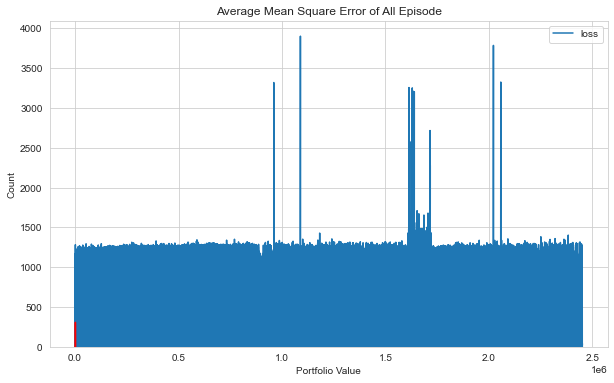

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

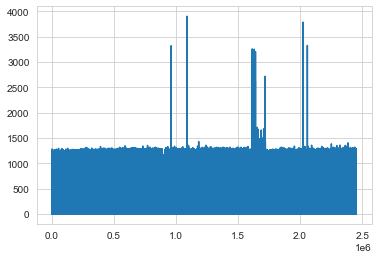

In [5]:
plt.plot(agent.model.losses)

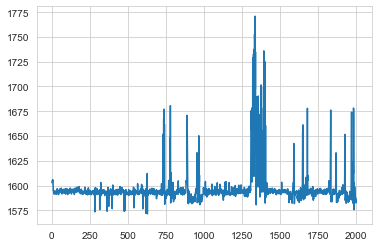

In [6]:
plt.plot(portfolio_value)

episode end value: 1286.33, duration: 0:00:00.117018
Sell: 386 times, Buy: 368 times


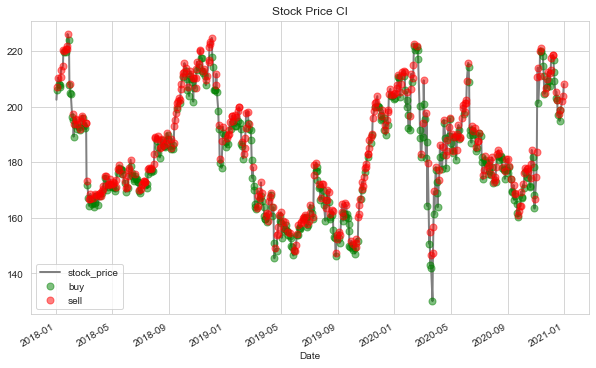

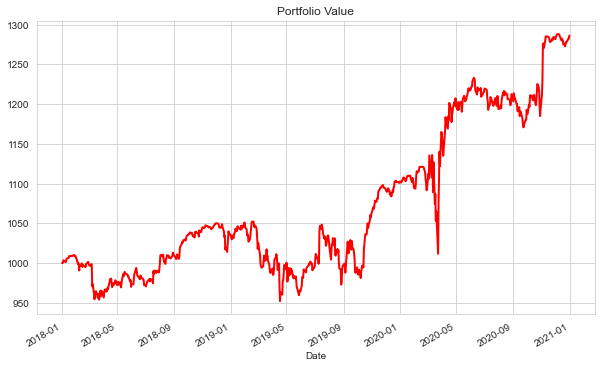

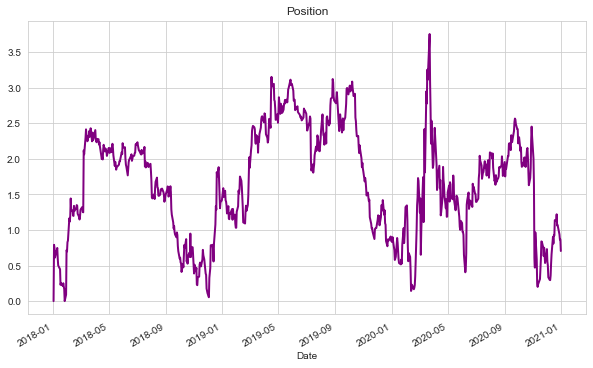

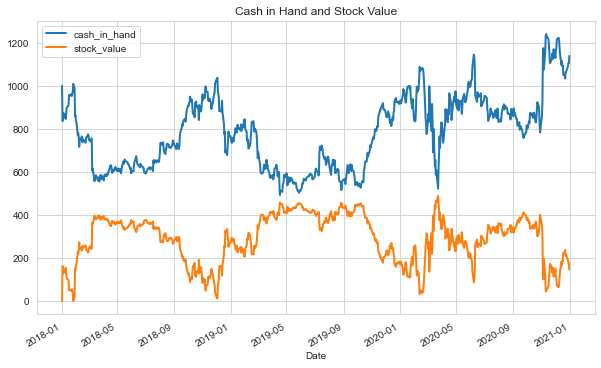

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CI
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 8.76 %
Volatility: 0.1186
shape ratio: 0.6452
Maximun drawdown: -10.94 %
Calmar ratio: 0.8000
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 0.92 %
Volatility (benchmark): 0.3871
shape ratio: -0.0047
Maximun drawdown: -42.51 %
Calmar ratio (benchmark): 0.0216


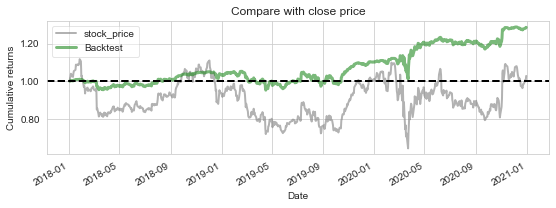

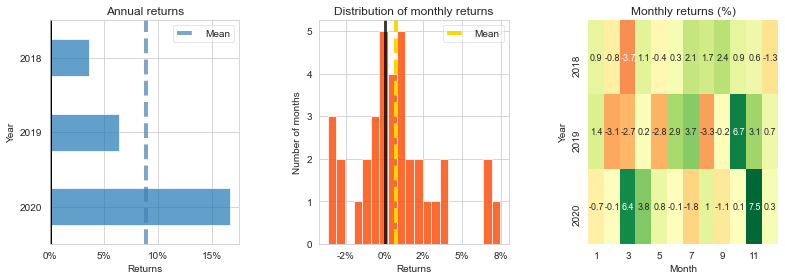

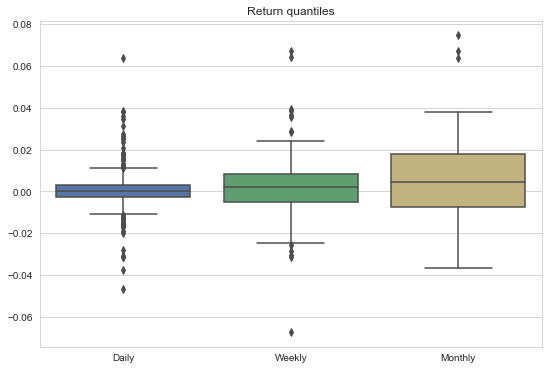

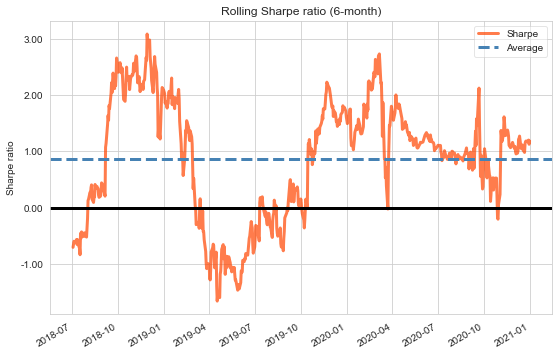

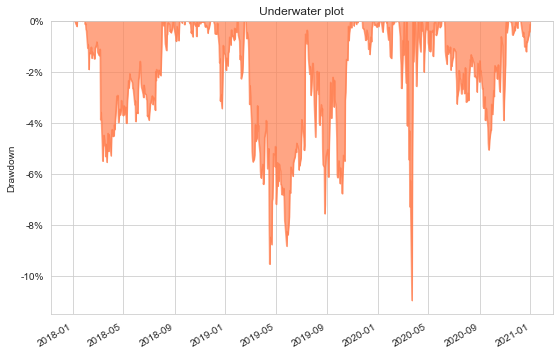

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')